In [20]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
df_action = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-01.온라인 행동 정보.csv', parse_dates=['sess_dt'])
df_transaction = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-02.거래 정보.csv', parse_dates=['de_dt'])
df_client_demo = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-03.고객 Demographic 정보.csv')
df_product = pd.read_csv('../input/제6회 L.POINT Big Data Competition-분석용데이터-04.상품분류 정보.csv')

In [3]:
df_action.tail(2)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
3196360,54403,3,1,0,A02,2019-07-31,20:14,16905,NaN,비비고왕교자,3.0,68.0,unknown,mobile_app
3196361,54403,4,1,0,A02,2019-08-18,16:35,82700,NaN,에포테쉬볼륨팝브러쉬,5.0,101.0,unknown,mobile_app


In [4]:
df_transaction.tail(2)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
599959,35311,2839,2,B03,0339,2019-09-27,14:09,4500,1
599960,35311,2839,6,B03,0324,2019-09-27,14:09,6800,1


In [5]:
df_client_demo.tail(2)

,clnt_id,clnt_gender,clnt_age
72397,72428,unknown,unknown
72398,72429,unknown,unknown


In [6]:
df_product.tail(2)

,pd_c,clac_nm1,clac_nm2,clac_nm3
1665,1666,Women's Clothing,Women's Upper Bodywear / Tops,Women's T-shirts / Tops
1666,1667,Women's Clothing,Women's Upper Bodywear / Tops,Women's Vests


In [7]:
df_action['sess_dt_dow'] = df_action.sess_dt.dt.dayofweek
df_action['sess_dt_dow_name'] = df_action.sess_dt.dt.weekday_name

In [37]:
def convert_str(row):
    if row['action_type'] == 0:
        return '검색'
    elif row['action_type'] == 1:
        return '제품목록'
    elif row['action_type'] == 2:
        return '제품 세부정보 보기'
    elif row['action_type'] == 3:
        return '장바구니 제품 추가'
    elif row['action_type'] == 4:
        return '장바구니 제품 삭제'
    elif row['action_type'] == 5:
        return '결제 시도'
    elif row['action_type'] == 6:
        return '구매 완료'
    elif row['action_type'] == 7:
        return '구매 환불'
    else:
        return '결제 옵션'

In [38]:
df_action['action_type_str'] = df_action.apply(lambda row: convert_str(row), axis=1)

Text(0.5, 1.0, 'Frequency of session by week day')

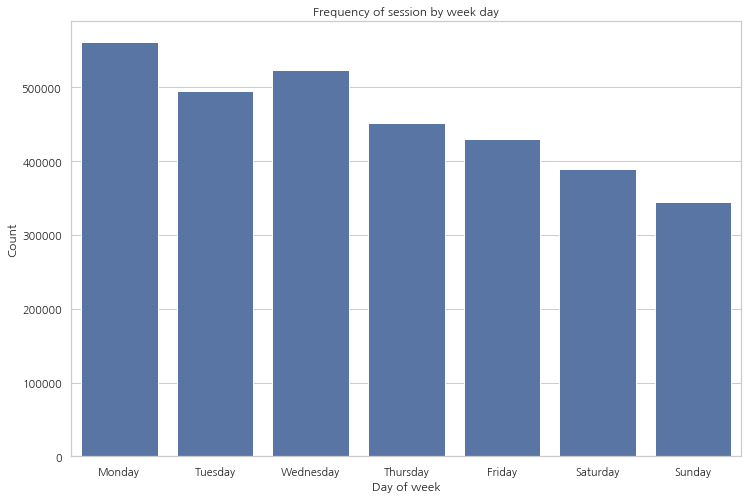

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="sess_dt_dow_name", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title('Frequency of session by week day')

**Seems like Monday and Wednesday when the session are high and low during Friday.**

In [10]:
df_transaction['de_dt_dow'] = df_transaction.de_dt.dt.dayofweek
df_transaction['de_dt_dow_name'] = df_transaction.de_dt.dt.weekday_name

Text(0.5, 1.0, 'Frequency of order by week day')

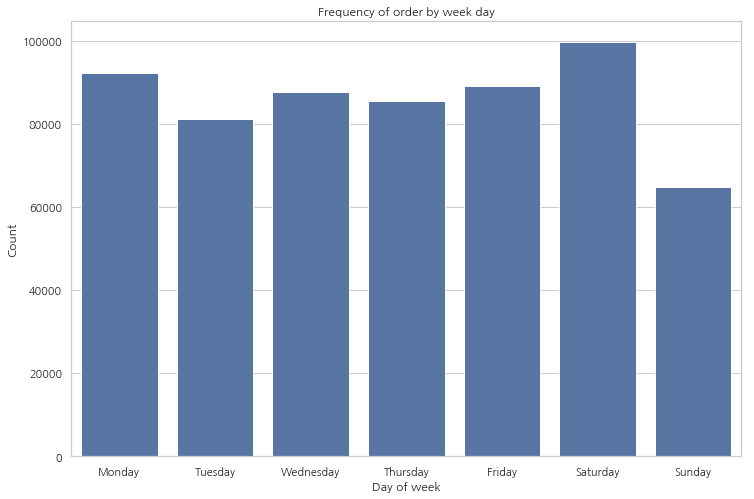

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="de_dt_dow_name", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], data=df_transaction, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title('Frequency of order by week day')

**Seems like 0 and 5 is Saturday and Monday when the orders are high and low during Sunday.**

In [12]:
df_transaction["de_tm_hour"] = df_transaction["de_tm"].apply(lambda time: time.split(':')[0])

Text(0.5, 1.0, 'Frequency of order by hour of day')

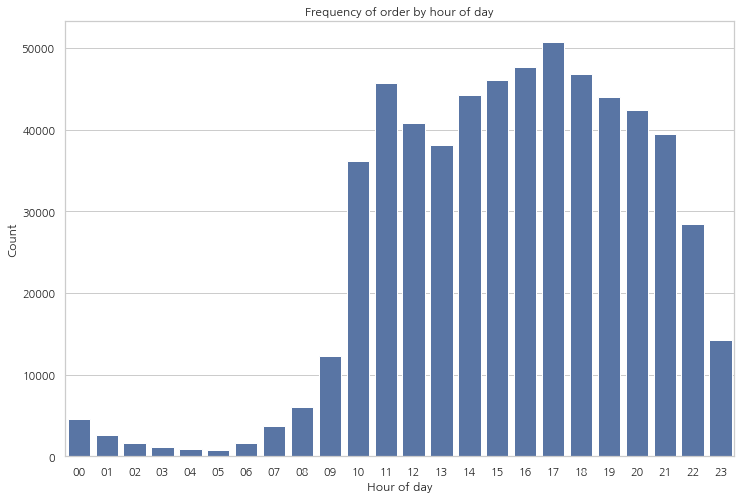

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="de_tm_hour", data=df_transaction, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title('Frequency of order by hour of day')

So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution

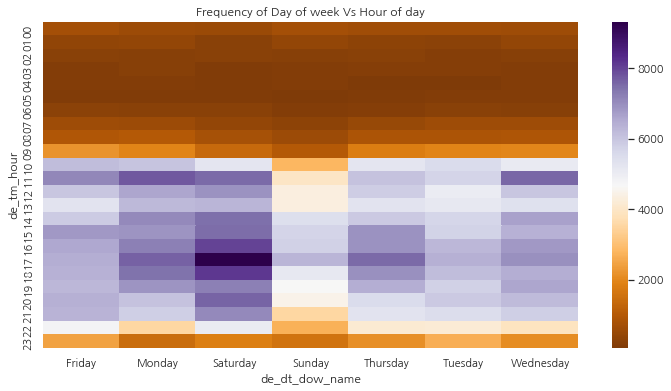

In [16]:
grouped_df = df_transaction.groupby(["de_dt_dow_name", "de_tm_hour"])["buy_ct"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('de_dt_dow_name', 'de_tm_hour', 'buy_ct').T

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df, cmap='PuOr')
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

**Seems Thursday evening and Saturday morning are the prime time for orders**

In [17]:
df_transaction.loc[df_transaction['pd_c'] == 'unknown', 'pd_c'] = '0000'
df_transaction['pd_c'] = df_transaction['pd_c'].astype(int)
cnt_pd = df_transaction['pd_c'].value_counts().reset_index().head(20)
cnt_pd.columns = ['pd_c', 'frequency_count']
pd.merge(cnt_pd, df_product, how='left')

,pd_c,frequency_count,clac_nm1,clac_nm2,clac_nm3
0,0,17652,NaN,NaN,NaN
1,1213,15518,Snack Foods,Snacks,General Snacks
2,347,12914,Dairy Products,Milk,Fresh Milk
3,964,11115,Meats,Eggs,Chicken Eggs
4,1395,11083,Substitute Foods,Instant Noodles,Ramens
5,1617,10850,Vegetables,Tofu / Bean Sprouts,Tofu
6,221,10254,Cleaning / Laundry / Bathroom Accessories,Cleaning Accessories,Trash Bags
7,354,8417,Dairy Products,Yogurt,Spoon Type Yogurts
8,114,7882,Beverages,Water,Water
9,1210,7610,Snack Foods,Snacks,Corn Snacks


카테고리별로 groupby 후 sum 해보기

**Most of them are Foods products!**

In [21]:
cnt_sech = df_action['sech_kwd'].value_counts().reset_index().head(20)
cnt_sech.columns = ['sech_kwd', 'frequency_count']

In [22]:
cnt_sech

,sech_kwd,frequency_count
0,우유,8985
1,두부,5210
2,계란,5039
3,생수,4283
4,수박,2694
5,라면,2583
6,오이,2493
7,콩나물,2481
8,쌀,2046
9,식빵,2007


Text(0.5, 1.0, 'Frequency of Action type')

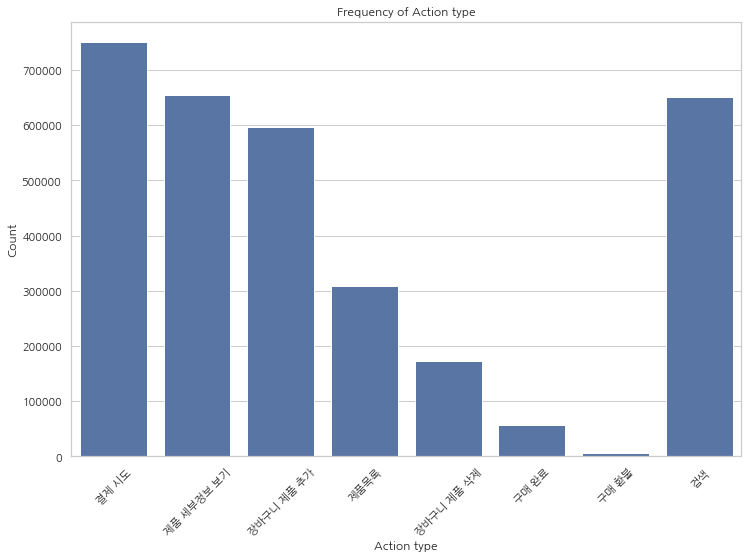

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x="action_type_str", data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Action type', fontsize=12)
plt.xticks(rotation=45)
plt.title('Frequency of Action type')

Text(0.5, 1.0, 'Frequency of Device Name')

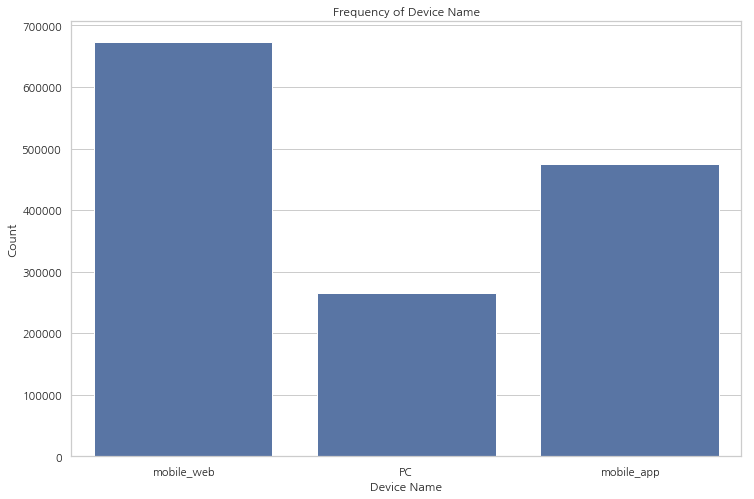

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x="dvc_ctg_nm", data=df_action, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Device Name', fontsize=12)
plt.title('Frequency of Device Name')

Text(0.5, 1.0, 'Count of Client Gender')

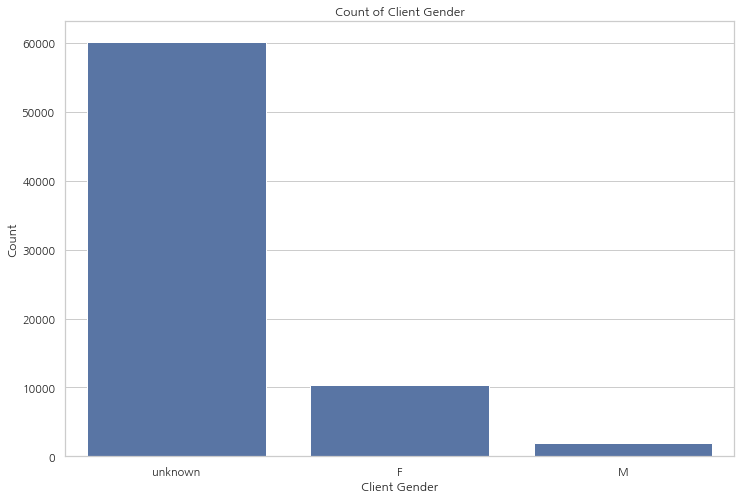

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x="clnt_gender", data=df_client_demo, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Client Gender', fontsize=12)
plt.title('Count of Client Gender')

Text(0.5, 1.0, 'Count of Client Age')

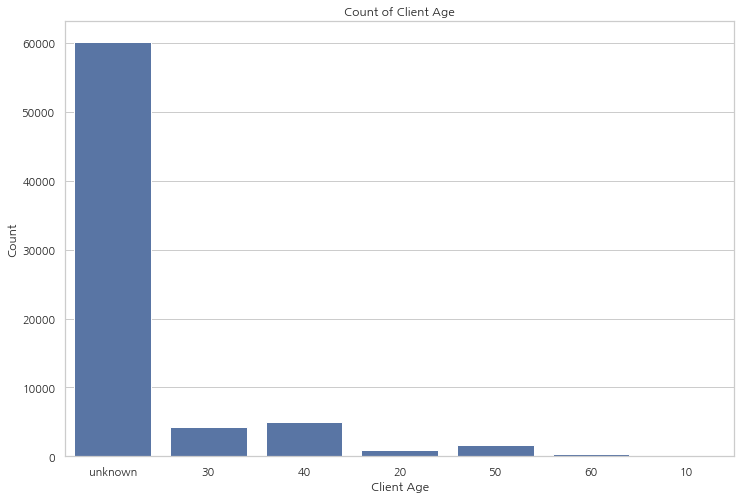

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x="clnt_age", data=df_client_demo, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Client Age', fontsize=12)
plt.title('Count of Client Age')